# Recreating Sagar analysis using Sagar Data

Currently taking too long to generate his source matrix manually, so I will here attempt to recreate his clustering using his own data and see what is what.

By looking at `sc@filterpar` we can see that dsn and sfn were not used, which were only introduced in RaceID3, so we know that Sagar generated the following tsne plot using RaceID3

 ![img](source/sagar_tsne_plot.png)
 
 

In [1]:
prdata <- readRDS("source//prdata.sagar")
control_sc <- readRDS("source//sc.sagar")
dim(control_sc@fdata)

[1] 865 304

In [2]:
source("source/RaceID3_StemID2_class.R")

Loading required package: tsne
Loading required package: pheatmap
Loading required package: MASS
Loading required package: cluster
Loading required package: mclust
Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: flexmix
Loading required package: lattice
Loading required package: fpc
Loading required package: amap
Loading required package: RColorBrewer
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: vegan
Loading required package: permute
This is vegan 2.4-6
Loading required package: Rtsne
Loading required package: scran
Loading required package: BiocParallel
Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘pack

In [3]:
head(prdata)

,SAE725FACS1_1_1,SAE725FACS1_1_2,SAE725FACS1_1_3,SAE725FACS1_1_4,SAE725FACS1_1_5,SAE725FACS1_1_6,SAE725FACS1_1_7,SAE725FACS1_1_8,SAE725FACS1_1_9,SAE725FACS1_1_10,⋯,SAE725FACS8_8_129,SAE725FACS8_8_145,SAE725FACS8_8_148,SAE725FACS8_8_154,SAE725FACS8_8_161,SAE725FACS8_8_164,SAE725FACS8_8_169,SAE725FACS8_8_173,SAE725FACS8_8_177,SAE725FACS8_8_180
0610007P14Rik,0.000000,0.000000,1.000122,4.001954,0.000000,1.000122,0,0,0,1.000122,⋯,2.000488,2.000488,0.000000,0,3.001099,0,0.000000,1.000122,0,1.000122
0610009B22Rik,0.000000,3.001099,4.001954,3.001099,1.000122,4.001954,0,0,0,1.000122,⋯,4.001954,1.000122,2.000488,0,2.000488,0,1.000122,0.000000,0,1.000122
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009L18Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009O20Rik,0.000000,1.000122,0.000000,0.000000,0.000000,1.000122,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,2.000488,0,0.000000,0.000000,0,1.000122
0610010F05Rik,1.000122,0.000000,0.000000,1.000122,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,1.000122,0,2.000488


## Filtering

Using RaceID2, Sagar managed to get a matrix of 865x304, according to the @filterpar he used:

mintotal: 5000  
minexpr: 5  
minnumber: 1  
maxexpr: Inf  
downsample: FALSE  
dsn: 1  
sfn: FALSE  
CGenes: "Malat1"   "Lars2"    "Mki67"    "Pcna-ps2"  
FGenes: "Hsp90aa1" "Jun"      "Fos" 

In [4]:
sc <- SCseq(prdata)

In [5]:
sc3 <- filterdata(
    sc, mintotal=3000, minexpr=5, maxexpr=500, 
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)
sc3Inf <- filterdata(
    sc, mintotal=3000, minexpr=5, maxexpr=Inf,
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)


sc4 <- filterdata(
    sc, mintotal=4000, minexpr=5, maxexpr=500, 
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)

sc4Inf <- filterdata(
    sc, mintotal=4000, minexpr=5, maxexpr=Inf,
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)

sc5 <- filterdata(
    sc, mintotal=5000, minexpr=5, maxexpr=500,
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)

sc5Inf <- filterdata(
    sc, mintotal=5000, minexpr=5, maxexpr=Inf,
    downsample = F, sfn = F, hkn = F,
    dsn = 1, rseed = 17000, CGenes = NULL, FGenes = NULL
)



In [6]:
out <- rbind(
    dim(sc@fdata),
    dim(sc3@fdata),
    dim(sc3Inf@fdata),
    dim(sc4@fdata),
    dim(sc4Inf@fdata),
    dim(sc5@fdata),
    dim(sc5Inf@fdata),
    dim(control_sc@fdata)
)
rownames(out) <- c("sc","sc3","sc3+Inf", "sc4", "sc4+Inf", "sc5", "sc5+Inf", "Sagar")
colnames(out) <- c("Genes", "Cells")

out


,Genes,Cells
sc,33901,430
sc3,393,326
sc3+Inf,393,326
sc4,571,314
sc4+Inf,571,314
sc5,868,304
sc5+Inf,868,304
Sagar,865,304


Above we compared minimum levels of filtering thresholds, each one with the max expression set to either 500 or infinity.

We did not apply the CGenes (cell-cycle genes) or FGenes (genes with high expression that we don't want)

As we can see, Sagar's filtering almost perfectly matches the sc5 (minexpr=5000) scenario and the setting of the max expression at 500 or Infinity has no effect.

 1. What is the overlap of sc5 and Sagar?
    * Which genes were excluded?
 2. Why did Sagar choose those genes to be excluded?
    * Can we recreate Sagar without using CGenes, but using "ccRemover" (not Grün's CCcorrect)?
 3. What led to the choice of those filtering parameters (why 5000, why Inf)?
 

## To answer Q1:

Loading required package: grid
Loading required package: futile.logger


[1] "Hsp90aa1" "Lars2"    "Pcna-ps2"

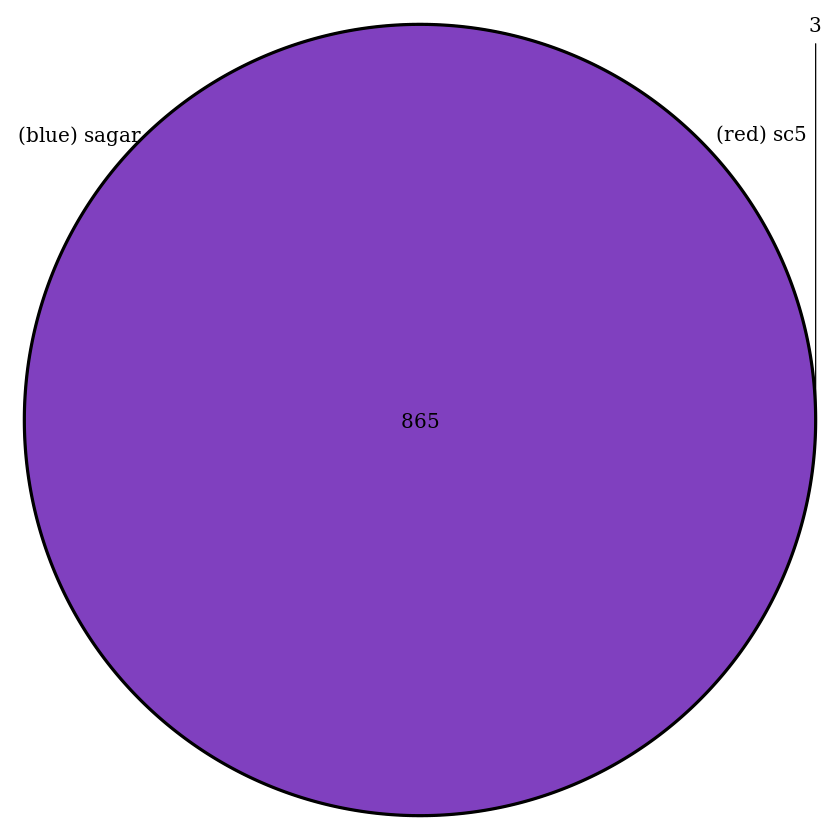

In [7]:
library(VennDiagram)

venn.plot <- venn.diagram(
    x = list(
        "(blue) sagar" = rownames(control_sc@fdata),
        "(red) sc5" = rownames(sc5@fdata)
    ),
    fill = c("blue","red"),
    filename = NULL
);
grid.draw(venn.plot);

rownames(sc5@fdata)[!rownames(sc5@fdata) %in% rownames(control_sc@fdata)]


As we can see, perfect overlap with all but 3 genes between sagar and the sc5 data.

It seems as if the discrepancy is simply given by the FGenes or the CGenes; 'Hsp90aa1' 'Lars2' 'Pcna-ps2'.

If we remind ourselves again of the genes Sagar filtered:

CGenes: "Malat1" "Lars2" "Mki67" "Pcna-ps2"  
FGenes: "Hsp90aa1" "Jun" "Fos" 

It seems as if these genes were known beforehand, so we will attempt to find them using other tools such as ccCleaner + Biomart, and ccRemover.

### ccCleaner + Biomart

In [8]:
require(biomaRt)
# Annotate the data before adding SC experiment

mart <- useMart(biomart = "ENSEMBL_MART_ENSEMBL", 
                dataset = "mmusculus_gene_ensembl")

k <- getBM(
    filters = "mgi_symbol",
    attributes = c(
            "ensembl_gene_id",              # Gene stable ID
            "external_gene_name",           # Casual name
            "mgi_symbol",
#            "external_transcript_name",     # Transcript-specific name
#            "gene_biotype",                 # Gene biotype
#            "transcript_biotype",           # Trans type
#            "description",                  # Gene description
#            "band",                         # Karyotype band
#            "refseq_mrna",
            "go_id",                        # Go Term accession (cellular domains)
#            "go_linkage_type",              # Go Term evidence code
            "name_1006"                    # Go Term name
#            "definition_1006",              # Go Term definition
#            "namespace_1003"                # Go domain                  
    ),
    values = rownames(sc5@fdata),
    mart = mart
)

Loading required package: biomaRt


In [10]:
gCC <- k$mgi_symbol[k$name_1006 == "cell cycle"]
gCP <- k$mgi_symbol[k$name_1006 == "cell proliferation"]
length(gCC)
length(gCP)

sagar_cGenes = c("Malat1", "Lars2", "Mki67", "Pcna-ps2")
sagar_fGenes = c("Hsp90aa1", "Jun", "Fos")

sagar_cGenes %in% gCC
sagar_cGenes %in% gCP
sagar_fGenes %in% gCC
sagar_fGenes %in% gCP

# Mki67 -- ENSG00000148773
# head(tail(k, -10700),50) #-- nothing
# grep("ENSG00000148773", k) #-- nothing

# Hsp90aa1 -- ENSMUSG00000021270
hsp_subk <- k[k$mgi_symbol %in% "Hsp90aa1",]
hsp_subk[grepl("prolif", hsp_subk$name_1006),] #--nothing
# This gene is in our matrix, but it is NOT flagged for cell proliferation,
# only the human transcript for this is, but not the mouse.
# (human:ENSG00000080824 → evidence:GO:0008284, 
#  mouse:ENSMUSG00000021270 → evidence:none )

[1] 64

[1] 30

[1] FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE

[1] FALSE FALSE FALSE

ensembl_gene_id,external_gene_name,mgi_symbol,go_id,name_1006


As we can see from the list of FALSE's, none of the Sagar genes were determined to be cell proliferating or other. Perhaps he assumed human and mouse cells were similar? Is this a reasonable assumption? Maybe the GO ids are outdated? (unlikely)

Regardless, we will remove the effect of the CP and CC genes from our analysis and press forward.

In [11]:
x <- CCcorrect(sc5@fdata, vset=vset, CGenes=NULL, ccor=.4, 
               nComp=NULL, pvalue=.05, quant=.01, mode="pca")

ERROR: Error in CCcorrect(sc5@fdata, vset = vset, CGenes = NULL, ccor = 0.4, : object 'vset' not found


In [ ]:
x$n

The number of principle components that have been removed is none, so this is most likely a correction we do not need to do, as evidenced by a quick examination of our input data, and the correction:

In [ ]:
head(sc5@fdata)
head(x$xcor)

### ccRemover

Let us see if ccRemover is any better at this:

In [ ]:
library(ccRemover)

# Data must be centred on a gene-by-gene basis
summary(apply(sc5@fdata,1, mean))
# Data is NOT centred, since the mean is not 0 but 3.
# Let's apply row centering
mean_gene_exp <- rowMeans(sc5@fdata)
sc5_centred_exp <- sc5@fdata - mean_gene_exp
summary(apply(sc5_centred_exp,1, mean))
# Now it is close to zero.


In [ ]:
gene_names <- rownames(sc5_centred_exp)
cell_cycle_gene_indices <- gene_indexer(
    gene_names, species = "mouse",
    name_type = "symbols"
)

length(cell_cycle_gene_indices)
length(union(gCC,gCP))

129 genes were detected which is more than the 84 unique genes previously detected from biomart.

In [ ]:
if_cc <- rep(FALSE,nrow(sc5_centred_exp)) 
if_cc[cell_cycle_gene_indices] <- TRUE
summary(if_cc)
dat <- list(x=sc5_centred_exp, if_cc=if_cc)

# perform cleaning
#head(sc5@fdata)

In [ ]:
xhat <- ccRemover(dat, bar=FALSE)
#str(sc)

ccRemover does not want to work.... We will skip.

## Determining why 5000 and Inf were chosen

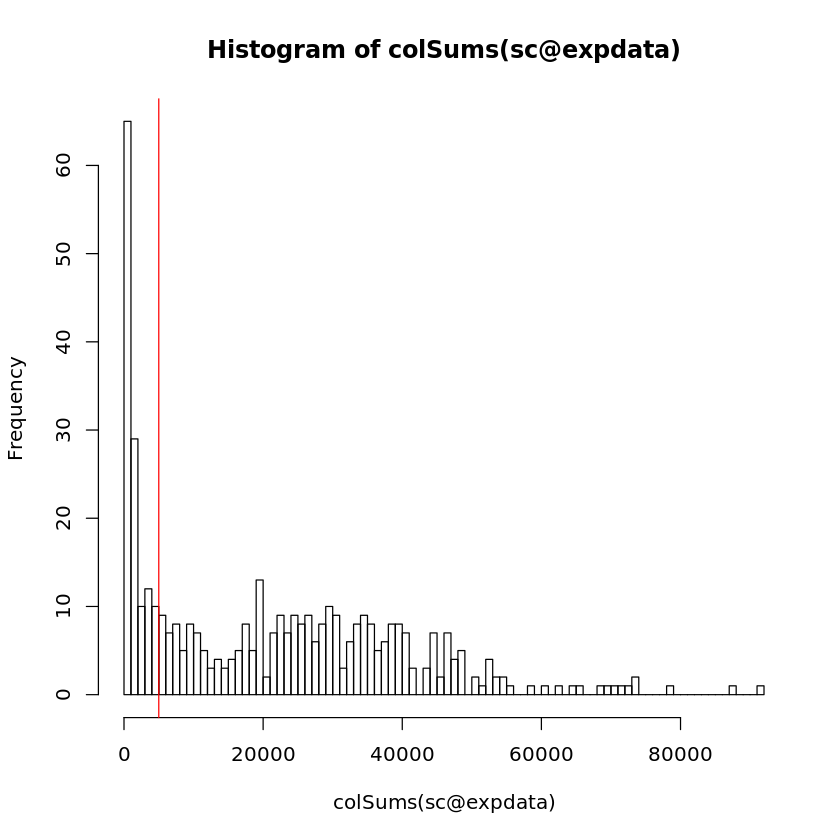

In [12]:
hist(colSums(sc@expdata), breaks=100)
abline(v=5000, col='red')

[1] 33901   430

[1] 19977   430

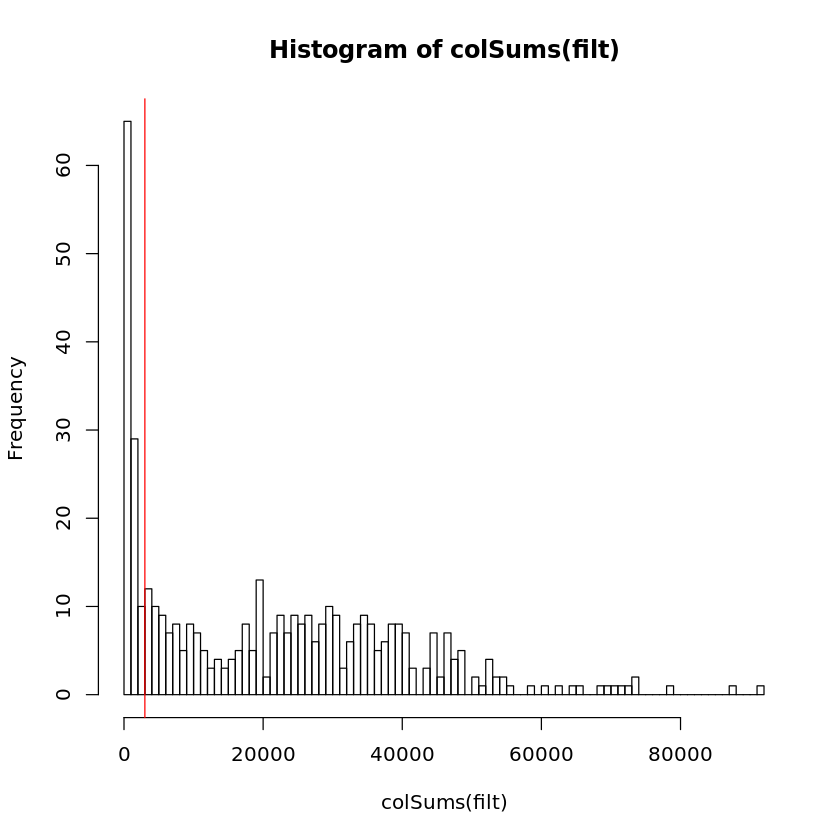

In [18]:
filt <- sc@expdata[rowSums(sc@expdata) > 0, colSums(sc@expdata) > 0]
dim(sc@expdata)
dim(filt)
hist(colSums(filt), breaks=100)
abline(v=3000, col='red')
#abline(v=5000, col='blue')
